# Lab 5

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-510/blob/main/book/labs/lab_04.ipynb)

## Exercise 1: Calculating Distances with Functions

- Define a function `calculate_distance` that takes two geographic coordinates (latitude and longitude) and returns the distance between them using the Haversine formula.
- Use this function to calculate the distance between multiple pairs of coordinates.

In [14]:
import math

def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    # Radius of Earth in kilometers
    r = 6371.0
    
    # Calculate the result
    return c * r

# Example
lat1 = 52.2296756
lon1 = 21.0122287
lat2 = 52.406374
lon2 = 16.9251681
distance = calculate_distance(lat1, lon1, lat2, lon2)
print((f"{distance} km"))

278.4581750754194 km


## Exercise 2: Batch Distance Calculation

- Create a function `batch_distance_calculation` that accepts a list of coordinate pairs and returns a list of distances between consecutive pairs.
- Test the function with a list of coordinates representing several cities.

In [15]:
import math

def batch_distance_calculation(points):
    distances = []
    for i in range(len(points) - 1):
        point1 = points[i]
        point2 = points[i + 1]
        
        # Convert latitude and longitude from degrees to radians
        lat1, lon1 = map(math.radians, point1)
        lat2, lon2 = map(math.radians, point2)

        # Haversine formula
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.asin(math.sqrt(a))
        
        # Radius of Earth in kilometers
        r = 6371.0
        
        # Calculate the result
        distance = c * r
        distances.append(distance)
    
    return distances

# Example usage
points = [
    (52.2296756, 21.0122287),  # Warsaw
    (52.406374, 16.9251681),   # Poznan
    (53.3498053, 18.951076),   # Torun
    (50.0646501, 19.9449799),  # Krakow
    (51.1078852, 17.0385376),  # Wroclaw
    (50.046943, 19.997711),    # Krakow
]

distances = batch_distance_calculation(points)
for i, distance in enumerate(distances):
    print(f"Distance from point {i} to point {i + 1}: {distance:.2f} km")

Distance from point 0 to point 1: 278.46 km
Distance from point 1 to point 2: 171.71 km
Distance from point 2 to point 3: 371.65 km
Distance from point 3 to point 4: 235.69 km
Distance from point 4 to point 5: 239.93 km


## Exercise 3: Creating and Using a Point Class

- Define a `Point` class to represent a geographic point with attributes `latitude`, `longitude`, and `name`.
- Add a method `distance_to` that calculates the distance from one point to another.
- Instantiate several `Point` objects and calculate the distance between them.

In [16]:
import math

class Point:
    def __init__(self, latitude, longitude, name=""):
        self.latitude = latitude
        self.longitude = longitude
        self.name = name

    def distance_to(self, other_point):
        # Haversine formula to calculate the distance between two points on the Earth
        R = 6371  # Radius of the Earth in kilometers
        lat1 = math.radians(self.latitude)
        lon1 = math.radians(self.longitude)
        lat2 = math.radians(other_point.latitude)
        lon2 = math.radians(other_point.longitude)

        dlat = lat2 - lat1
        dlon = lon2 - lon1

        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        distance = R * c
        return distance

cities = [
    Point(52.2296756, 21.0122287, "Warsaw"),
    Point(52.406374, 16.9251681, "Poznan"),
    Point(53.3498053, 18.951076, "Torun"),
    Point(50.0646501, 19.9449799, "Krakow"),
    Point(51.1078852, 17.0385376, "Wroclaw"),
    Point(50.046943, 19.997711, "Krakow"),
]

for i in range(len(cities) - 1):
    city1 = cities[i]
    city2 = cities[i + 1]
    print(f"Distance from {city1.name} to {city2.name}: {city1.distance_to(city2)} km")
    

Distance from Warsaw to Poznan: 278.4581750754194 km
Distance from Poznan to Torun: 171.71083521844025 km
Distance from Torun to Krakow: 371.6468219937416 km
Distance from Krakow to Wroclaw: 235.68847189713608 km
Distance from Wroclaw to Krakow: 239.93109485110068 km


## Exercise 4: Reading and Writing Files

- Write a function `read_coordinates` that reads a file containing a list of coordinates (latitude, longitude) and returns them as a list of tuples.
- Write another function `write_coordinates` that takes a list of coordinates and writes them to a new file.
- Ensure that both functions handle exceptions, such as missing files or improperly formatted data.

In [17]:
def read_coordinates(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    points = []
    for line in lines:
        parts = line.split(",")
        name = parts[0]
        latitude = float(parts[1])
        longitude = float(parts[2])
        points.append(Point(latitude, longitude, name))
        
    if len(points) < 2:
        raise ValueError("The file must contain at least two points")

    return points

def write_coordinates(file_path, points):
    with open(file_path, "w") as file:
        for point in points:
            file.write(f"{point.name},{point.latitude},{point.longitude}\n")
            
    if file == None: 
        print("Error saving file")
    else:  
        print("File saved")
            
# Example usage
coords = [
    Point(52.2296756, 21.0122287, "Warsaw"),
    Point(52.406374, 16.9251681, "Poznan"),
    Point(53.3498053, 18.951076, "Torun"),
    Point(50.0646501, 19.9449799, "Krakow"),
    Point(51.1078852, 17.0385376, "Wroclaw"),
    Point(50.046943, 19.997711, "Krakow"),
]

output_file = "cities.csv"
bad_file = "none.txt"
points = write_coordinates(output_file, coords)

points = read_coordinates(output_file)
# bad_points = read_coordinates(bad_file) # This will raise an exception
# print(bad_points)

for point in points:
    print(point.name, point.latitude, point.longitude)


File saved
Warsaw 52.2296756 21.0122287
Poznan 52.406374 16.9251681
Torun 53.3498053 18.951076
Krakow 50.0646501 19.9449799
Wroclaw 51.1078852 17.0385376
Krakow 50.046943 19.997711


## Exercise 5: Processing Coordinates from a File

- Create a function that reads coordinates from a file and uses the `Point` class to create `Point` objects.
- Calculate the distance between each consecutive pair of points and write the results to a new file.
- Ensure the function handles file-related exceptions and gracefully handles improperly formatted lines.

In [18]:
# Create a sample coordinates.txt file
sample_data = """35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

output_file = "coordinates.txt"

try:
    with open(output_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{output_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")

Sample file 'coordinates.txt' has been created successfully.


In [19]:
# Part 1: Read coordinates from a file
class Point:
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

    def __str__(self):
        return f"({self.latitude}, {self.longitude})"
    
    def read_coordinates(file_path):
        with open(file_path, "r") as file:
            lines = file.readlines()

        points = []
        for line in lines:
            parts = line.split(",")
            latitude = float(parts[0])
            longitude = float(parts[1])
            points.append(Point(latitude, longitude))
            
        if len(points) < 2:
            raise ValueError("The file must contain at least two points")
        
        return points
    
    def write_coordinates(file_path, points):
        with open(file_path, "w") as file:
            for point in points:
                file.write(f"{point.latitude},{point.longitude}\n")
                
    def distance(self, other_point):
        # Haversine formula to calculate the distance between two points on the Earth
        R = 6371  # Radius of the Earth in kilometers
        lat1 = math.radians(self.latitude)  # Convert latitude from degrees to radians
        lon1 = math.radians(self.longitude)  # Convert longitude from degrees to radians    
        lat2 = math.radians(other_point.latitude)
        lon2 = math.radians(other_point.longitude)
        
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        
        # Exceptions: TypeError, ValueError
        if not isinstance(other_point, Point):
            raise TypeError("The input must be a Point object")
        if not isinstance(other_point, Point):
            raise ValueError("The input must be a Point object")
                
        distance = R * c
        return distance

# Example usage
file_path = "coordinates.txt"
points = Point.read_coordinates(file_path)
for point in points:
    print(point)
    
# Part 2: Write coordinates to a file
file_path = "output.txt"
Point.write_coordinates(file_path, points)
print(f"Coordinates have been written to '{file_path}'")

# Part 3: Calculate the distance between two points in the file
point1 = points[0]
point2 = points[1]
distance = point1.distance(point2)
print(f"Distance between {point1} and {point2}: {distance:.2f} km")



(35.6895, 139.6917)
(34.0522, -118.2437)
(51.5074, -0.1278)
(-33.8688, 151.2093)
(48.8566, 2.3522)
Coordinates have been written to 'output.txt'
Distance between (35.6895, 139.6917) and (34.0522, -118.2437): 8815.47 km


## Exercise 6: Exception Handling in Data Processing

- Modify the `batch_distance_calculation` function to handle exceptions that might occur during the calculation, such as invalid coordinates.
- Ensure the function skips invalid data and continues processing the remaining data.

In [20]:
def batch_distance_calculation(points):
    distances = []
    for i in range(len(points) - 1):
        point1 = points[i]
        point2 = points[i + 1]
        
        # Convert latitude and longitude from degrees to radians
        lat1, lon1 = map(math.radians, point1)
        lat2, lon2 = map(math.radians, point2)

        # Haversine formula
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
        c = 2 * math.asin(math.sqrt(a))
        
        # Radius of Earth in kilometers
        r = 6371.0
        
        # Calculate the result
        distance = c * r
        distances.append(distance)
        
    # Exception handling
    if len(points) < 2:
        raise ValueError("The list must contain at least two points")
    if not all(isinstance(point, Point) for point in points):
        raise TypeError("All elements in the list must be Point objects")
    
    return distances


# Example of exception handling
points = [Point(52.2296756, 21.0122287)]
try:
    distances = batch_distance_calculation(points)  # This will raise an exception
except ValueError as e:
    print(f"ValueError: {e}")

ValueError: The list must contain at least two points


## Exercise 7: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [21]:
# 2D NumPy array with coordinates
import numpy as np

# Create a 2D NumPy array with coordinates
coordinates = np.array([
    [35.6895, 139.6917],
    [34.0522, -118.2437],
    [51.5074, -0.1278],
    [-33.8688, 151.2093],
    [48.8566, 2.3522]
])
print(coordinates)

# Convert array 
radians = np.radians(coordinates)
print(radians)

# Calculate difference 
diff = np.diff(radians, axis=0)
print(diff)

[[ 3.568950e+01  1.396917e+02]
 [ 3.405220e+01 -1.182437e+02]
 [ 5.150740e+01 -1.278000e-01]
 [-3.386880e+01  1.512093e+02]
 [ 4.885660e+01  2.352200e+00]]
[[ 6.22899283e-01  2.43808010e+00]
 [ 5.94323008e-01 -2.06374188e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [-5.91122074e-01  2.63910014e+00]
 [ 8.52708531e-01  4.10536347e-02]]
[[-0.02857628 -4.50182199]
 [ 0.30465071  2.06151135]
 [-1.49009579  2.64133068]
 [ 1.44383061 -2.59804651]]


## Exercise 8: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [22]:
import pandas as pd

# Load the dataset
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
cities = pd.read_csv(url)
print(cities.head())

   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062


In [23]:
# Filter by Population
cities = cities[cities["population"] > 1_000_000]
print(cities.head())

      id            name country  latitude  longitude  population
97    98           Turin     ITA  45.07039    7.66996     1652000
103  104           Lille     FRA  50.64997    3.08001     1044000
123  124  San Bernardino     USA  34.12038 -117.30003     1745000
124  125      Bridgeport     USA  41.17998  -73.19996     1018000
126  127      Manchester     GBR  53.50042   -2.24799     2230000


In [24]:
# Filter by Country and Calculate Total per Country
total_population = cities.groupby("country")["population"].sum()
print(total_population.head())

country
AFG     3277000
AGO     6272900
ARE     1379000
ARG    15450000
ARM     1102000
Name: population, dtype: int64


In [25]:
# Sort cities
sorted_cities = cities.sort_values("population", ascending=False)
top_ten = sorted_cities.head(10)
print(top_ten)

        id          name country  latitude  longitude  population
1239  1240         Tokyo     JPN  35.68502  139.75141    35676000
1224  1225      New York     USA  40.74998  -73.98002    19040000
1230  1231   Mexico City     MEX  19.44244  -99.13099    19028000
1240  1241        Mumbai     IND  19.01699   72.85699    18978000
1245  1246     Sao Paulo     BRA -23.55868  -46.62502    18845000
1148  1149         Delhi     IND  28.66999   77.23000    15926000
1238  1239      Shanghai     CHN  31.21645  121.43650    14987000
1243  1244       Kolkata     IND  22.49497   88.32468    14787000
1175  1176         Dhaka     BGD  23.72306   90.40858    12797394
1217  1218  Buenos Aires     ARG -34.60250  -58.39753    12795000


## Exercise 9: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

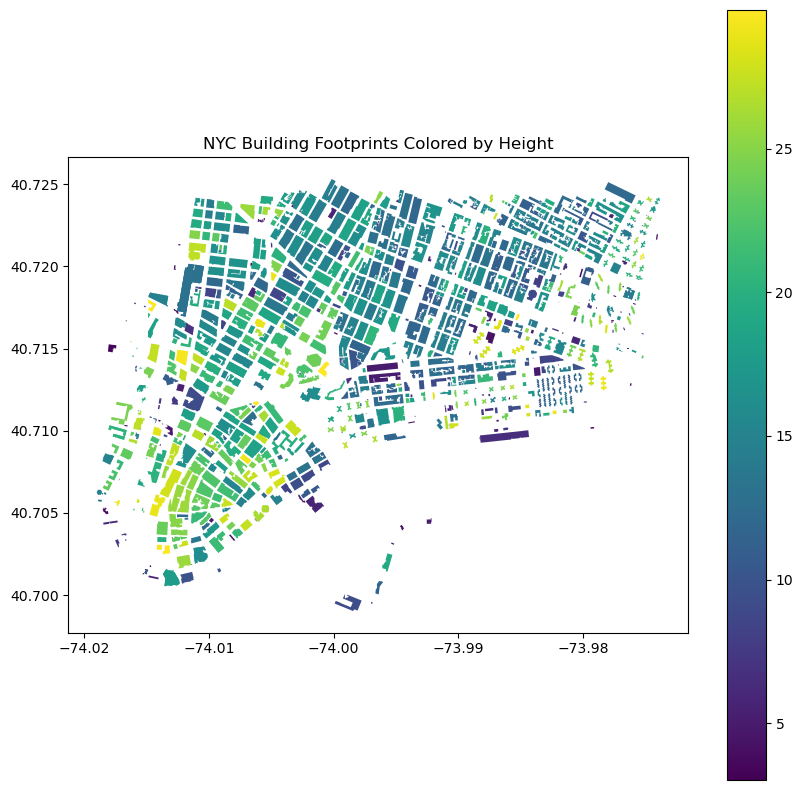

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the New York City building dataset
url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(url)

# Plot the building footprints and color them based on the building height
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='height_MS', ax=ax, legend=True, cmap='viridis')
plt.title('NYC Building Footprints Colored by Height')
plt.show()

In [27]:
import geopandas as gpd
import folium
import branca.colormap as cm

# Load the New York City building dataset
url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(url)

# Replace None values in the 'height_MS' column with 0 or another appropriate value
gdf['height_MS'] = gdf['height_MS'].fillna(0)

# Create a Folium map centered around New York City
m = folium.Map(location=[40.7128, -74.0060], zoom_start=15, tiles='cartodbpositron')

# Create a color map
min_height = gdf['height_MS'].min()
max_height = gdf['height_MS'].max()
colormap = cm.linear.YlGnBu_09.scale(min_height, max_height)

# Define a style function that colors buildings based on height
def style_function(feature):
    height = feature['properties']['height_MS']
    return {
        'fillColor': colormap(height),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }

# Add the building footprints to the map
folium.GeoJson(
    gdf,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['height_MS'], aliases=['Height (m):'])
).add_to(m)

# Add the color map to the map
colormap.add_to(m)

# Display the map
m

In [28]:
avg_height = gdf['height_MS'].mean()
print(f"The average height of buildings in New York City is {avg_height:.2f} meters")

The average height of buildings in New York City is 14.31 meters


In [29]:
tall_buildings = gdf[gdf['height_MS'] > avg_height]
print(f"There are {len(tall_buildings)} buildings taller than the average height in New York City")

There are 612 buildings taller than the average height in New York City


In [30]:
new_path = "nyc_buildings.geojson"
gdf.to_file(new_path, driver='GeoJSON')
print(f"Data has been saved to '{new_path}'")

Data has been saved to 'nyc_buildings.geojson'


## Exercise 10: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

In [31]:
import pandas as pd

path = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
world_cities = pd.read_csv(path)
print(world_cities.head())

   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062


In [32]:
# Between -40 and 60 degrees latitude
filtered_cities = world_cities[(world_cities['latitude'] > -40) & (world_cities['latitude'] < 60)]
print(filtered_cities.head())

   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062


In [65]:
# Convert to gpdf
import geopandas as gpd

gdf = gpd.GeoDataFrame(filtered_cities, geometry=gpd.points_from_xy(filtered_cities.longitude, filtered_cities.latitude))
print(gdf.head())

   id         name country  latitude  longitude  population  \
0   1        Bombo     UGA    0.5833    32.5333       75000   
1   2  Fort Portal     UGA    0.6710    30.2750       42670   
2   3      Potenza     ITA   40.6420    15.7990       69060   
3   4   Campobasso     ITA   41.5630    14.6560       50762   
4   5        Aosta     ITA   45.7370     7.3150       34062   

                 geometry  
0  POINT (32.5333 0.5833)  
1    POINT (30.275 0.671)  
2   POINT (15.799 40.642)  
3   POINT (14.656 41.563)  
4    POINT (7.315 45.737)  


In [66]:
import geopandas as gpd
import folium
import branca.colormap as cm

# Set the CRS to WGS84 (EPSG:4326) if it's not already set
if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Reproject to Mercator
gdf = gdf.to_crs(epsg=3395)
print(gdf.crs)

EPSG:3395


In [67]:
import geopandas as gpd
import folium

# Assuming gdf is already defined and contains the cities' data

# Coordinates of Paris
paris_coords = (48.8566, 2.3522)
paris_point = gpd.GeoSeries([Point(paris_coords[1], paris_coords[0])], crs="EPSG:4326")

# Calculate distance from each city to Paris
gdf['distance_to_paris'] = gdf.distance(paris_point[0])
gdf

,id,name,country,latitude,longitude,population,geometry,distance_to_paris
0,1,Bombo,UGA,0.58330,32.53330,75000,POINT (3621590.39 64499.104),3.622161e+06
1,2,Fort Portal,UGA,0.67100,30.27500,42670,POINT (3370197.584 74197.058),3.371011e+06
2,3,Potenza,ITA,40.64200,15.79900,69060,POINT (1758736.635 4931842.62),5.236004e+06
3,4,Campobasso,ITA,41.56300,14.65600,50762,POINT (1631498.457 5067386.732),5.323504e+06
4,5,Aosta,ITA,45.73700,7.31500,34062,POINT (814302.075 5707690.257),5.765436e+06
...,...,...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000,POINT (-4811787.216 -2606316.094),5.472336e+06
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000,POINT (-5190273.485 -2682650.979),5.842589e+06
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000,POINT (16829857.253 -3994223.003),1.729735e+07
1247,1248,Singapore,SGP,1.29303,103.85582,5183700,POINT (11561176.998 142988.156),1.156206e+07


In [72]:
import folium

import branca.colormap as cm

# Create a Folium map centered around Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=2, tiles='cartodbpositron')

# Create a color map
min_distance = gdf['distance_to_paris'].min()
max_distance = gdf['distance_to_paris'].max()
colormap = cm.linear.YlOrRd_09.scale(min_distance, max_distance)

# Add the points to the map
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=colormap(row['distance_to_paris']),
        fill=True,
        fill_color=colormap(row['distance_to_paris']),
        fill_opacity=0.7,
        popup=f"{row['name']}: {row['distance_to_paris']:.2f} meters"
    ).add_to(m)

# Add the color map to the map
colormap.add_to(m)

# Display the map
m

## Submission Requirements

Complete the exercises above and and upload the notebook to your GitHub repository. Make sure the notebook has a Colab badge at the top so that it can be easily opened in Google Colab. Submit the URL of the notebook to Canvas.